#### Paul Flanagan
#### Due: 14-Dec-2022
## Final Project

### Data Preparation
#### Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Data

In [2]:
data = sns.load_dataset('diamonds')

#### Data Cleaning
Applying the data cleaning steps from the previous step of the project:
- Changing grade values to more easily sortable and manageable integer values
- Replacing outlier dimension values with calculated real values
- Dropping impossible 0 length, width, or depth data values

In [3]:
data["cut"].replace({"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}, inplace=True)
data["color"].replace({"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}, inplace=True)
data["clarity"].replace({"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}, inplace=True)

data = data.astype({'cut':'int64','color':'int64','clarity':'int64'}, copy=False)

data.at[24067,'y']=19.3
data.at[49189,'y']=11.4
data.at[48410,'z']=3.17

indexZeroValue = data[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)].index
data.drop(indexZeroValue, inplace=True)

With the data prepped, it is time to approach our questions about the data set:
1. What are the standard dimensions for a diamond being sold?
2. What is the distribution of carat sizes typically circulating in the market?
3. How are the tiers of qualities distributed?
4. How rare are the highest tiers of quality in a diamond?
5. How does a diamond's value correlate with each of the main attributes?

### Question 1:
##### What are the standard dimensions for a diamond being sold?

A numerical answer can be found by finding the mean of the dimension values x, y, and z

In [4]:
print("Average x, y, and z dimensions of a diamond sold in this dataset:")
print(str(round(data["x"].mean(),2)) + "mm by " + str(round(data["y"].mean(),2)) + "mm by " + str(round(data["z"].mean(),2)) + "mm")

Average x, y, and z dimensions of a diamond sold in this dataset:
5.73mm by 5.73mm by 3.54mm


After collecting the numeric data, graphically representing the result against the rest of the data will give a better understanding of the distribution of the diamonds' dimensions

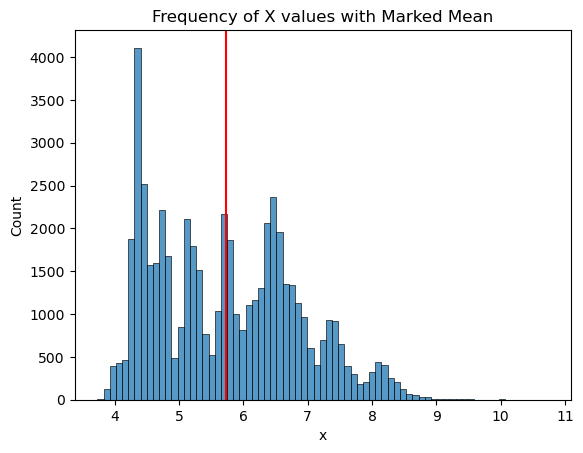

In [5]:
graph = sns.histplot(x=data["x"])
graph.set(title="Frequency of X values with Marked Mean")
graph.axvline(data["x"].mean(), color='red')

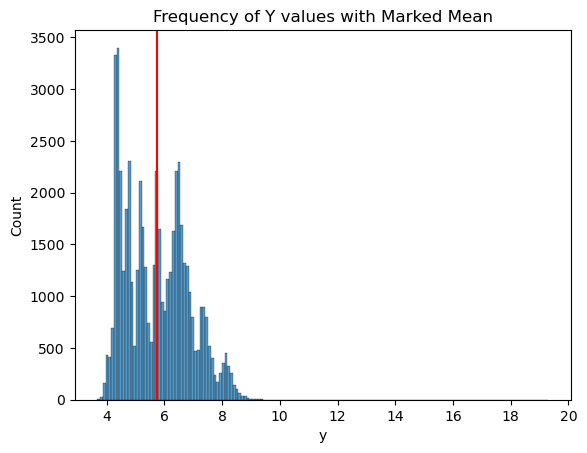

In [6]:
graph = sns.histplot(x=data["y"])
graph.set(title="Frequency of Y values with Marked Mean")
graph.axvline(data["y"].mean(), color='red')

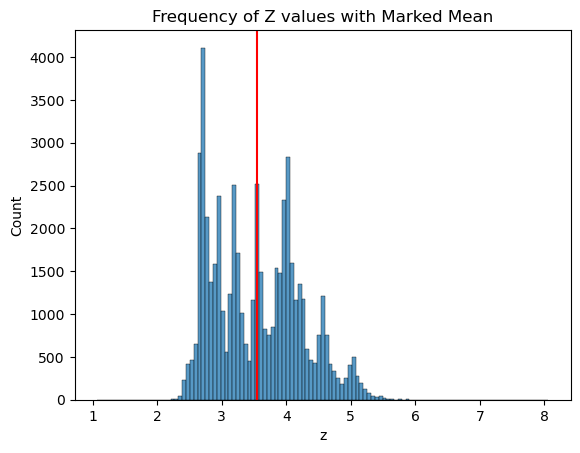

In [7]:
graph = sns.histplot(x=data["z"])
graph.set(title="Frequency of Z values with Marked Mean")
graph.axvline(data["z"].mean(), color='red')

With the assistance of these graphs, it is additionally demonstrated that the distribution of the diamonds' shapes trends towards the lower end of the range for all dimensions, with outliers being more common on the upper end than the lower end

### Question 2:
##### What is the distribution of carat sizes typically circulating in the market?

This information can be assessed with a simple histogram of the carat attribute, after fine tuning the bin width to best present the data

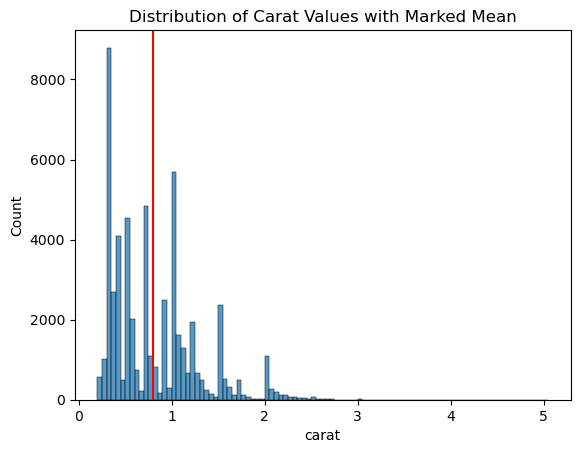

In [8]:
graph = sns.histplot(data["carat"], binwidth=0.05)
graph.set(title = "Distribution of Carat Values with Marked Mean")
graph.axvline(data["carat"].mean(), color='red')

The average engagement ring diamond is 0.75 carats, so this distribution is understandable, but the spike in records at around 0.3 carats is intriguing, and it is not clear exactly what it represents

### Question 3:
##### How are the tiers of quality attributes distributed?

To answer this question, the cut, color, and clarity attributes will be examined. As a reminder, the qualities are ranked with a 1 corresponding to the lowest quality tier

[Text(0.5, 1.0, 'Cut Distribution')]

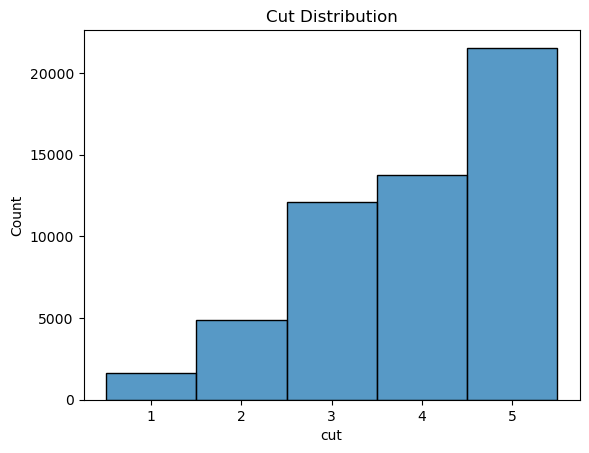

In [9]:
sns.histplot(data["cut"],bins=(0.5,1.5,2.5,3.5,4.5,5.5)).set(title="Cut Distribution")

[Text(0.5, 1.0, 'Color Distribution')]

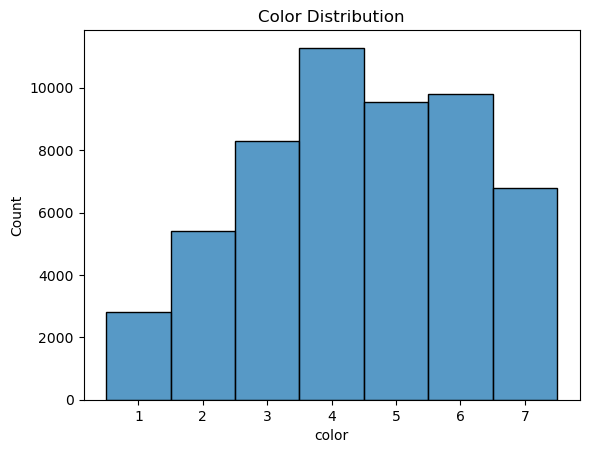

In [10]:
sns.histplot(data["color"], bins=(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5)).set(title="Color Distribution")

[Text(0.5, 1.0, 'Clarity Distribution')]

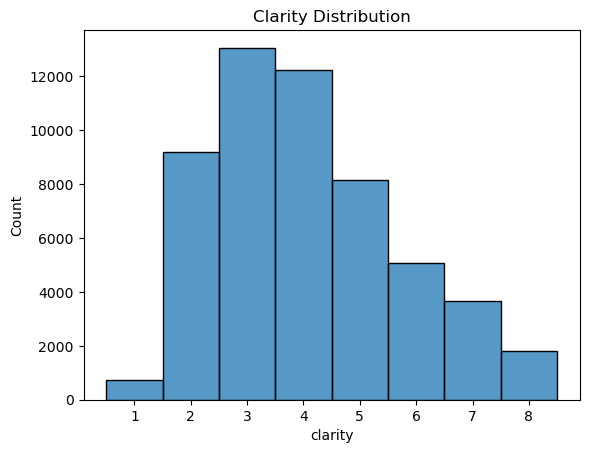

In [11]:
sns.histplot(data["clarity"], bins=(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5)).set(title="Clarity Distribution")

It would appear that the quality distribution is different for each attribute: 
- Cut is very strongly left-skewed, with the largest number of diamonds belonging to the highest quality tier
- Color is largely centrally distributed, with slightly more diamonds falling on the upper half of the spectrum than the lower half
- Clarity is moderately right-skewed, with most diamonds being on the lower end, but very few being in the lowest quality tier

To offer a potential interpretation of this information: color and clarity, the hue and presence of internal blemishes of a diamond, respectively, are innate characteristics of a diamond. Cut, on the other hand, is entirely dependent on the work of the gemcutter, suggesting that the skill of gemcutters and the demand for high quality cuts resulted in a very high standard for cut quality in the diamond market

These distributions could also suggest that the diamond market more strongly selects for sufficient coloring than clarity, such that it is easier to sell a diamond with adequate color but lesser clarity than vice versa

### Question 4:
##### How rare are the highest tiers of quality in a diamond?

This question can begin to be answered using the same graphs above. An ideally cut diamond is not rare at all, being the plurality of diamonds in the sample, a perfect "D" color diamond is a bit more rare, being the fifth most and third least frequent color represented, and a clarity rating of the highest tier "IF" is the most rare, as the seventh most and second least frequent rating

A fuller picture of the rarity of top tier diamonds can be gained by looking at how often these qualities coincide; that is, what portion of the data set have one, two, or all three qualities in the uppermost tier.

In [20]:
numOneMax = len(data[(data['cut'] == 5) | (data['color'] == 7) | (data['clarity'] == 8)])
numTwoMax = len(data[((data['cut'] == 5) & (data['color'] == 7)) | 
                ((data['color'] == 7) & (data['clarity'] == 8)) |
                ((data['clarity'] == 8) & (data['cut'] == 5))])
numAllMax = len(data[(data['cut'] == 5) & (data['color'] == 7) & (data['clarity'] == 8)])

numTotal = len(data)

print("Total diamonds: " + str(numTotal))
print("Total diamonds with at least one maximum quality: " + str(numOneMax) + " - " + str(round(100*numOneMax/numTotal,2)) + "%")
print("Total diamonds with at least two maximum qualities: " + str(numTwoMax) + " - " + str(round(100*numTwoMax/numTotal,2)) + "%")
print("Total diamonds with three maximum qualities: " + str(numAllMax) + " - " + str(round(100*numAllMax/numTotal,2)) + "%")


Total diamonds: 53920
Total diamonds with at least one maximum quality: 26021 - 48.26%
Total diamonds with at least two maximum qualities: 4063 - 7.54%
Total diamonds with three maximum qualities: 28 - 0.05%


So, while about half of the diamonds encountered can be expected to have at least an ideal cut, perfect color, or flawless clarity, only about two in twenty-five can be expected to have two of these qualities, and only one in about two thousand can be expected to have all three, making them exceedingly rare

### Question 5:
##### How does a diamond's value correlate with each of the main attributes?

This question can be approached with rough eyeballed linear regression: that is, by plotting each of the attributes against price and looking for patterns

[Text(0.5, 1.0, 'Impact of Carat on Price')]

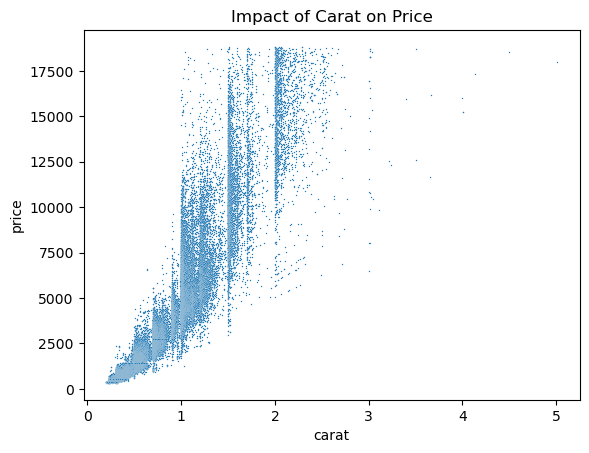

In [13]:
sns.scatterplot(x=data["carat"],y=data["price"], s=1).set(title="Impact of Carat on Price")

[Text(0.5, 1.0, 'Impact of Cut on Price')]

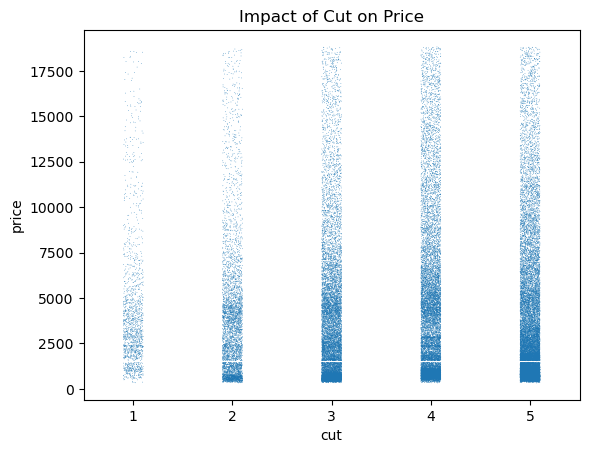

In [14]:
sns.stripplot(x=data["cut"],y=data["price"], size=.5, color="tab:blue").set(title="Impact of Cut on Price")

[Text(0.5, 1.0, 'Impact of Color on Price')]

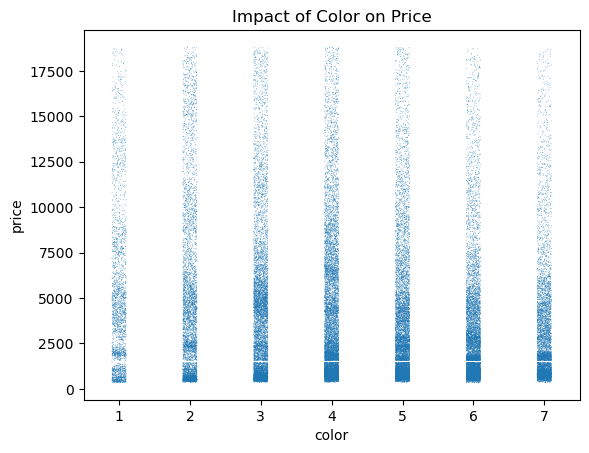

In [15]:
sns.stripplot(x=data["color"],y=data["price"], size=.5, color="tab:blue").set(title="Impact of Color on Price")

[Text(0.5, 1.0, 'Impact of Clarity on Price')]

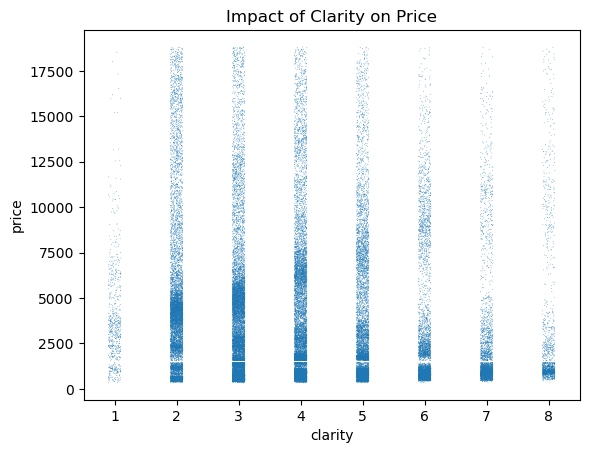

In [16]:
sns.stripplot(x=data["clarity"],y=data["price"], size=.5, color="tab:blue").set(title="Impact of Clarity on Price")

[Text(0.5, 1.0, 'Impact of Depth on Price')]

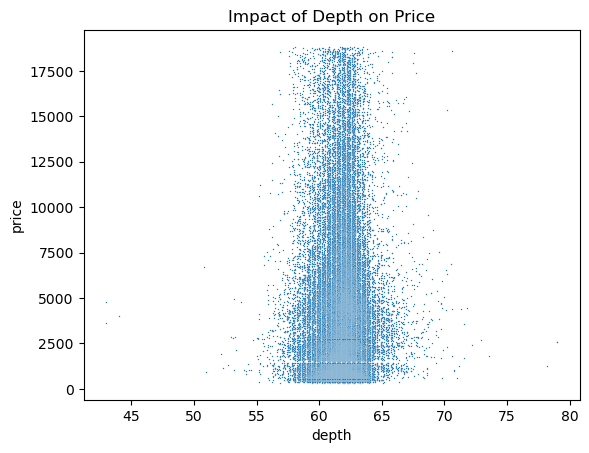

In [17]:
sns.scatterplot(x=data["depth"],y=data["price"], s=1).set(title="Impact of Depth on Price")

[Text(0.5, 1.0, 'Impact of Table on Price')]

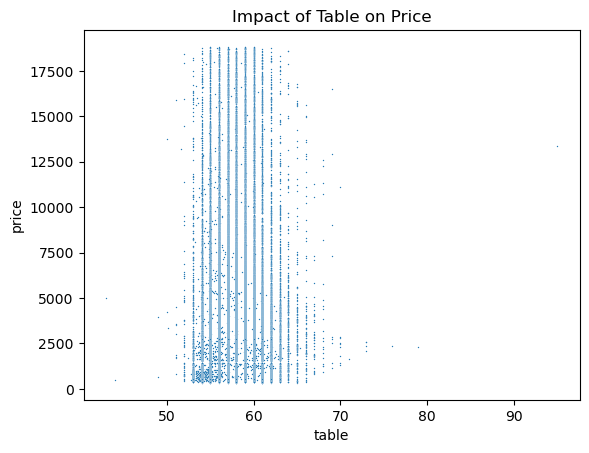

In [18]:
sns.scatterplot(x=data["table"],y=data["price"], s=1).set(title="Impact of Table on Price")

With this information, it appears that carat is the attribute with the most direct influence on a diamond's price, displaying a clear positive trend and exhibiting caps on the price for smaller carat diamonds and floors on the price for larger carat diamonds